# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto Final: Telecomunicaciones- identificar operadores ineficaces

-------

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisoras información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Los objetivos de este proyecto son los siguientes:

- Llevar a cabo el análisis exploratorio de datos

- Identificar operadores ineficaces

- Probar las hipótesis estadísticas

## **Criterios de eficiencia de los operadores**

Para evaluar la eficiencia operativa de cada operador, es necesario establecer criterios claros y medibles.
Estos criterios permiten identificar con precisión qué comportamientos o métricas reflejan un buen desempeño y cuáles indican oportunidades de mejora.

Los principales indicadores definidos en este análisis son:

**Tasa de llamadas perdidas (missed_rate)**

- Representa el porcentaje de llamadas que no fueron atendidas.

- Un operador eficiente mantiene esta tasa por debajo del promedio general.

**Tiempo promedio de espera (avg_wait_time)**

- Mide el tiempo que los clientes deben esperar antes de ser atendidos.

- Valores más bajos indican mayor agilidad y capacidad de respuesta.

**Proporción de llamadas salientes (out_rate)**

- Evalúa la proporción de llamadas iniciadas por el operador frente al total.

- En operadores que deben realizar llamadas salientes, una proporción baja sugiere ineficiencia o inactividad.

A partir de estos criterios, se pueden definir rangos o umbrales para clasificar el desempeño de los operadores (por ejemplo, “eficiente”, “promedio”, “ineficiente”).
Esto permitirá generar conclusiones objetivas y comparables dentro del análisis.

**En este link se encuentra una presentacion con los hallazgos finales del proyecto:** https://drive.google.com/file/d/1L3RrzGDsVfQ-M3aKYaCyzc7Ux6mKw746/view?usp=sharing

## 1. Carga y limpieza de datos

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargamos datos

df_clients = pd.read_csv('telecom_clients.csv')
df_calls = pd.read_csv('telecom_dataset_new.csv')

In [2]:
df_calls.info()

df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2 

In [3]:
df_calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
df_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
# Asignamos un valor 'Unknown' a los valoes NaN y corregimos tipo de datos
df_calls['operator_id'] = df_calls['operator_id'].fillna('Unknown')
df_calls['operator_id'] = df_calls['operator_id'].astype(str).str.strip()

In [6]:
# Conteo de valores nulos por columna
df_calls.isna().sum()

user_id                  0
date                     0
direction                0
internal               117
operator_id              0
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

In [7]:
df_clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [8]:
# Porcentaje de nulos para tener mejor contexto
(df_calls.isna().sum() / len(df_calls) * 100).round(2)

user_id                0.00
date                   0.00
direction              0.00
internal               0.22
operator_id            0.00
is_missed_call         0.00
calls_count            0.00
call_duration          0.00
total_call_duration    0.00
dtype: float64

In [9]:
(df_clients.isna().sum() / len(df_clients) * 100).round(2)

user_id        0.0
tariff_plan    0.0
date_start     0.0
dtype: float64

In [10]:
# Verificar si hay filas duplicadas
duplicados_calls = df_calls.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados_calls}")

duplicados_clients = df_clients.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados_clients}")

Número de filas duplicadas: 4900
Número de filas duplicadas: 0


In [11]:
# Verificamos datos duplicados
duplicados = df_calls[df_calls.duplicated(keep=False)]
print(duplicados.head(10))

    user_id                       date direction internal operator_id  \
6    166377  2019-08-05 00:00:00+03:00       out    False    880020.0   
8    166377  2019-08-05 00:00:00+03:00       out    False    880020.0   
27   166377  2019-08-12 00:00:00+03:00        in    False     Unknown   
28   166377  2019-08-12 00:00:00+03:00        in    False     Unknown   
38   166377  2019-08-14 00:00:00+03:00        in    False     Unknown   
43   166377  2019-08-14 00:00:00+03:00       out    False    880026.0   
44   166377  2019-08-14 00:00:00+03:00       out    False    880026.0   
45   166377  2019-08-14 00:00:00+03:00        in    False     Unknown   
46   166377  2019-08-15 00:00:00+03:00       out    False    880026.0   
51   166377  2019-08-15 00:00:00+03:00       out    False    880026.0   

    is_missed_call  calls_count  call_duration  total_call_duration  
6             True            8              0                   50  
8             True            8              0          

In [12]:
# Verificar tipos de datos
df_calls.dtypes

user_id                 int64
date                   object
direction              object
internal               object
operator_id            object
is_missed_call           bool
calls_count             int64
call_duration           int64
total_call_duration     int64
dtype: object

In [13]:
df_clients.dtypes

user_id         int64
tariff_plan    object
date_start     object
dtype: object

In [14]:
# Convertimos tipos de datos
df_clients['date_start']= pd.to_datetime(df_clients['date_start'], errors='coerce')
df_calls['date']=pd.to_datetime(df_calls['date'], errors='coerce')
df_calls[['direction', 'internal']] = df_calls[['direction', 'internal']].astype('category')

count    53902.000000
mean       290.448870
std       1127.905654
min          0.000000
25%         17.000000
50%         55.000000
75%        201.000000
max      46474.000000
Name: wait_time, dtype: float64


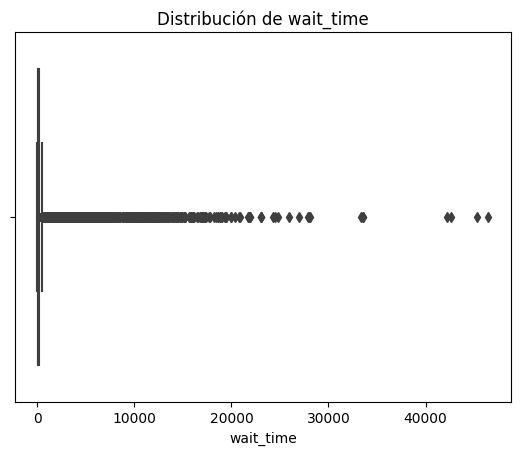

In [15]:
# Agregamos columna 'wait_time'
df_calls['wait_time'] = df_calls['total_call_duration'] - df_calls['call_duration']

# Revisamos estadísticas generales
print(df_calls['wait_time'].describe())

# Revisamos valores extremos
sns.boxplot(x=df_calls['wait_time'])
plt.title('Distribución de wait_time')
plt.show()

Después de crear la columna wait_time (diferencia entre total_call_duration y call_duration), se detectó la presencia de varios valores extremos u outliers.
Estos valores pueden deberse a errores de registro o a tiempos de espera anormalmente largos que distorsionan el análisis general.
Ahora filtremos y eliminemos solo los valores anómalos que podrían distorsionar los análisis posteriores.

In [16]:
# Eliminamos valores negativos 
df_calls = df_calls[df_calls['wait_time'] >= 0]

#Revisamos las estadisticas
print(df_calls['wait_time'].describe())

count    53902.000000
mean       290.448870
std       1127.905654
min          0.000000
25%         17.000000
50%         55.000000
75%        201.000000
max      46474.000000
Name: wait_time, dtype: float64


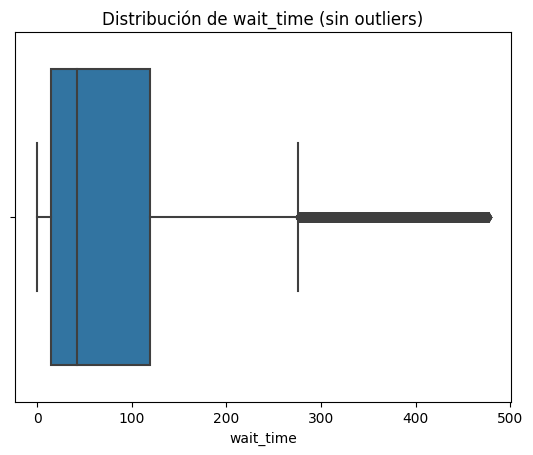

In [17]:
# Detectamos outliers con el metodo IQR (Interquartile Range)
Q1 = df_calls['wait_time'].quantile(0.25)
Q3 = df_calls['wait_time'].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos valores dentro del rango aceptable
df_calls = df_calls[(df_calls['wait_time'] >= lower_bound) & (df_calls['wait_time'] <= upper_bound)]

#Visualizamos para confirmar
sns.boxplot(x=df_calls['wait_time'])
plt.title('Distribución de wait_time (sin outliers)')
plt.show()

El filtrado anterior consistio en:
- Eliminar valores negativos: Los tiempos de espera no pueden ser menores que cero, por lo que se eliminaron los registros con wait_time < 0.

- Se calculó el rango intercuartílico (IQR) y se conservaron únicamente los valores dentro del rango.

- Se visualizó nuevamente la distribución de wait_time mediante un diagrama de caja (boxplot) para confirmar que los valores extremos fueron correctamente filtrados.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente ejecución en la etapa de carga y limpieza de datos. Mostraste dominio en la verificación de duplicados, manejo de valores nulos, conversión de tipos y detección de outliers. La estructura del análisis refleja un proceso ordenado y técnico, ideal para bases de datos reales. Buen avance en la preparación del dataset.  
</div>


## 2. Analisis Exploratorio

El objetivo de este paso es entender el comportamiento de cada operador antes de decidir quiénes son ineficaces.

In [18]:
df_calls['missed_count'] = df_calls['is_missed_call'] * df_calls['calls_count']

# Agrupamos por operador
operadores_stats = df_calls.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),      
    missed_calls=('missed_count', 'sum'), 
    avg_wait_time=('wait_time', 'mean'),
    median_wait_time=('wait_time', 'median'),
    avg_call_duration=('call_duration', 'mean')
).reset_index()

# Calcular porcentaje de llamadas perdidas
operadores_stats['missed_percent'] = (
    operadores_stats['missed_calls'] / operadores_stats['total_calls'] *100
)

# Revisar resultados
operadores_stats[['operator_id','total_calls','missed_calls','missed_percent']].sort_values('total_calls', ascending=False).head(15)

,operator_id,total_calls,missed_calls,missed_percent
1077,Unknown,39101,38087,97.406716
943,952948.0,4760,306,6.428571
202,901880.0,4279,726,16.966581
108,893804.0,4086,624,15.271659
78,891410.0,3699,1012,27.358746
79,891414.0,3299,955,28.948166
115,894656.0,3259,1211,37.158638
496,921818.0,3156,656,20.785805
203,901884.0,2749,682,24.809021
508,923526.0,2697,556,20.615499


In [19]:
# Revisamos estadísticas descriptivas generales
operadores_stats[['total_calls', 'missed_percent', 'avg_wait_time', 'avg_call_duration']].describe()

,total_calls,missed_percent,avg_wait_time,avg_call_duration
count,1078.000000,1078.000000,1078.000000,1078.000000
mean,271.771800,27.561670,71.025201,362.134759
std,1277.967565,26.354351,71.828811,505.471781
min,1.000000,0.000000,0.000000,0.000000
25%,10.000000,3.881668,21.541667,67.562500
50%,47.000000,23.492323,42.558929,198.702381
75%,259.000000,38.498363,103.965543,482.193137
max,39101.000000,100.000000,413.000000,6233.350000


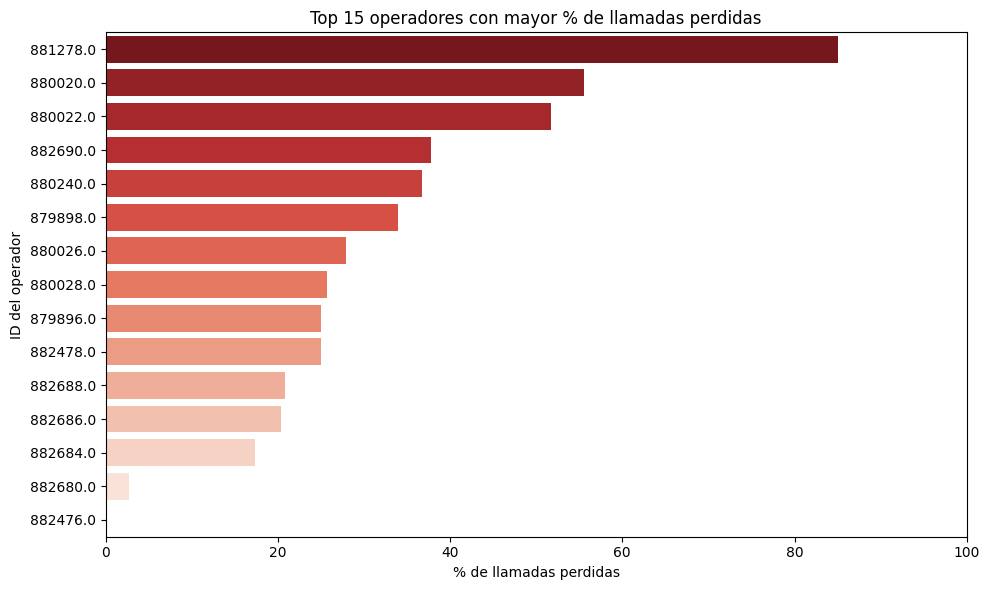

In [20]:
# Ordenar por % de llamadas perdidas y tomar top 15
top_missed = operadores_stats.head(15)

top_missed = top_missed.sort_values('missed_percent', ascending=False)

# Visualizamos
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_missed,
    x='missed_percent',
    y='operator_id',
    palette='Reds_r'
)
plt.title('Top 15 operadores con mayor % de llamadas perdidas')
plt.xlabel('% de llamadas perdidas')
plt.ylabel('ID del operador')
plt.xlim(0, 100) 
plt.tight_layout()
plt.show()

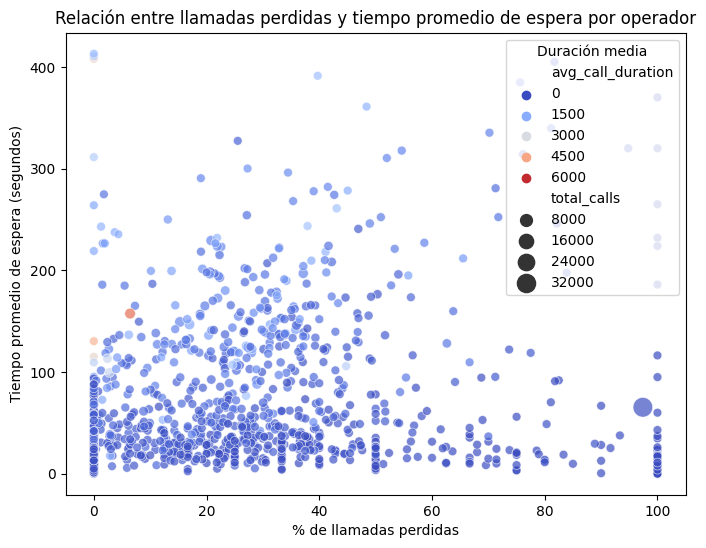

In [21]:
# Visualizamos
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=operadores_stats,
    x='missed_percent',
    y='avg_wait_time',
    hue='avg_call_duration',
    palette='coolwarm',
    size='total_calls',
    sizes=(40,200),
    alpha=0.7
)
plt.title('Relación entre llamadas perdidas y tiempo promedio de espera por operador')
plt.xlabel('% de llamadas perdidas')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.legend(title='Duración media')
plt.show()

***Análisis exploratorio por operador***

En esta etapa se realizó un análisis descriptivo del comportamiento de los operadores para identificar patrones generales de desempeño.

Se agruparon los datos por `operator_id` y se calcularon las siguientes métricas:
- Volumen total de llamadas (`total_calls`)
- Número y porcentaje de llamadas perdidas (`missed_calls`, `missed_percent`)
- Tiempo promedio y mediano de espera (`avg_wait_time`, `median_wait_time`)
- Duración promedio de las llamadas (`avg_call_duration`)

Estas métricas permiten detectar operadores con bajo volumen de llamadas, altos porcentajes de llamadas perdidas o tiempos de espera prolongados, posibles indicadores de ineficacia.

Finalmente, se utilizaron estadísticas descriptivas globales para obtener una visión general del rango de desempeño entre los operadores.

----
Para complementar el análisis numérico, se generaron gráficos que permiten observar de forma visual la ineficacia de los operadores:

- **Gráfico de barras:** muestra los 15 operadores con mayor porcentaje de llamadas perdidas con respecto al total de llamadas realizadas.
- **Gráfico de dispersión:** compara el porcentaje de llamadas perdidas con el tiempo promedio de espera, destacando a quienes presentan simultáneamente ambos indicadores elevados. Los puntos parecen estar concentrados en una esquina inferior (poca variabilidad), eso indica que la mayoría de operadores tienen bajo % de llamadas perdidas y tiempos de espera cortos.

Estos gráficos ayudan a identificar fácilmente a los operadores menos eficientes, facilitando su priorización para revisión o capacitación.

### 2.2 Distribuciones de llamadas

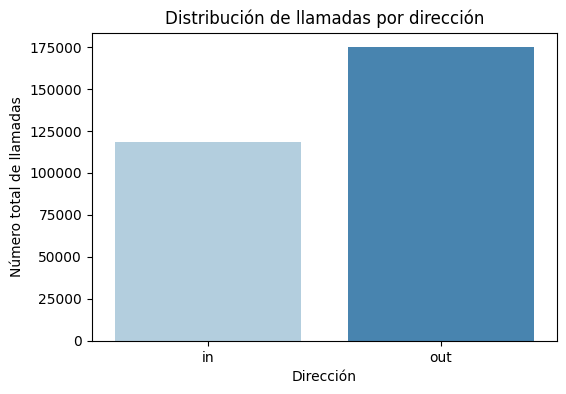

In [22]:
# Distribución por direction (in / out)
# Contar llamadas por dirección
direction_counts = df_calls.groupby('direction')['calls_count'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(data=direction_counts, x='direction', y='calls_count', palette='Blues')
plt.title('Distribución de llamadas por dirección')
plt.ylabel('Número total de llamadas')
plt.xlabel('Dirección')
plt.show()

Se analizaron las llamadas según su dirección: entrantes (`in`) y salientes (`out`).  

- El gráfico de barras muestra un numero total de aproximadamente 125.000 llamadas entrantes y casi 175.000 llamadas salientes. 
- Esto permite identificar si la operación está más enfocada en recibir llamadas o en realizarlas.

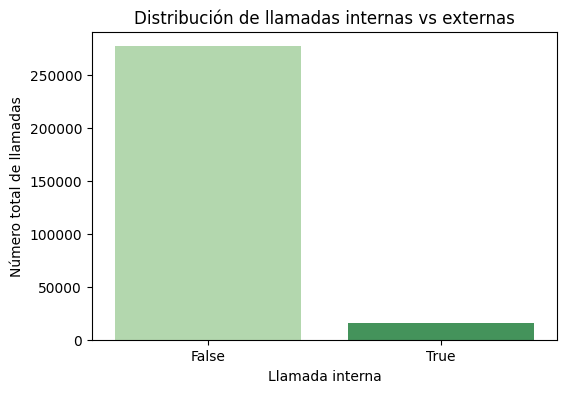

In [23]:
## Distribución por internal (llamadas internas o externas)
# Contar llamadas internas vs externas
internal_counts = df_calls.groupby('internal')['calls_count'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(data=internal_counts, x='internal', y='calls_count', palette='Greens')
plt.title('Distribución de llamadas internas vs externas')
plt.ylabel('Número total de llamadas')
plt.xlabel('Llamada interna')
plt.show()

Se clasificaron las llamadas según si son internas (entre operadores del mismo cliente) o externas:  

- El gráfico de barras permite ver qué proporción de llamadas son **internas** (aproximadamente menos de 25.000 llamadas) y cuáles son **externas** (casi 300.000 llamadas).  
- Esto es útil para evaluar la eficiencia y carga de trabajo interna del operador.

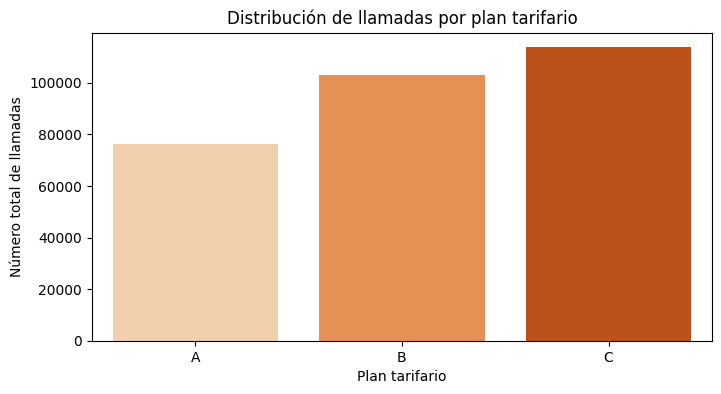

In [24]:
## Distribución por tariff_plan
# Merge para agregar tarifa a cada llamada
df = df_calls.merge(df_clients[['user_id','tariff_plan']], on='user_id', how='left')

# Contar llamadas por tarifa
tariff_counts = df.groupby('tariff_plan')['calls_count'].sum().reset_index()

# Gráfico
plt.figure(figsize=(8,4))
sns.barplot(data=tariff_counts, x='tariff_plan', y='calls_count', palette='Oranges')
plt.title('Distribución de llamadas por plan tarifario')
plt.ylabel('Número total de llamadas')
plt.xlabel('Plan tarifario')
plt.show()

Se evaluó la cantidad de llamadas según el plan tarifario de cada cliente:  

- Esto permite identificar qué plan genera más llamadas y puede ser útil para decisiones comerciales o de staffing. En este caso, los tres planes muestran un total de llamadas parecidos, siendo el plan C el de mayor cantidad de llamadas, alrededor de 120.000. 

### 2.3 Identificar outliers y operadores con comportamiento atípico.

Usaremos el método del rango intercuartílico (IQR) para detectar valores atípicos:

In [25]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detectamos outliers en % de llamadas perdidas
outliers_missed = detect_outliers_iqr(operadores_stats, 'missed_percent')

# Detectamos outliers en duración promedio de llamada
outliers_call_duration = detect_outliers_iqr(operadores_stats, 'avg_call_duration')

# Detectamos outliers en tiempo de espera promedio
outliers_wait_time = detect_outliers_iqr(operadores_stats, 'avg_wait_time')

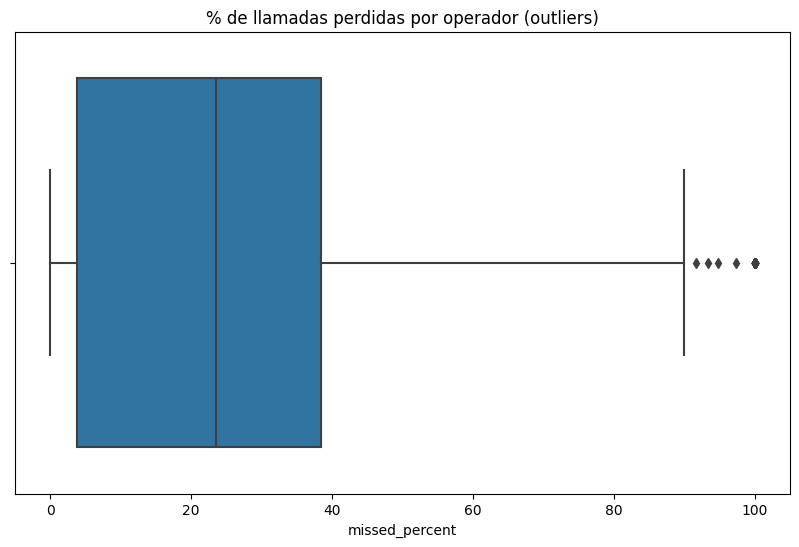

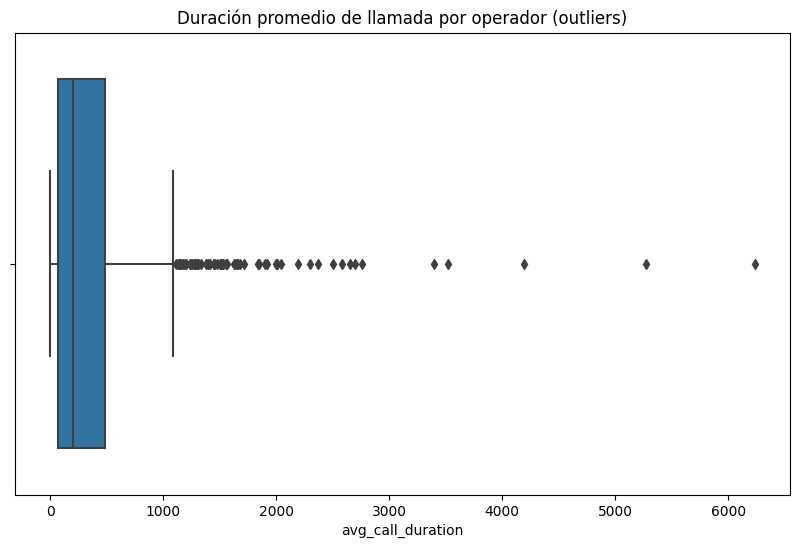

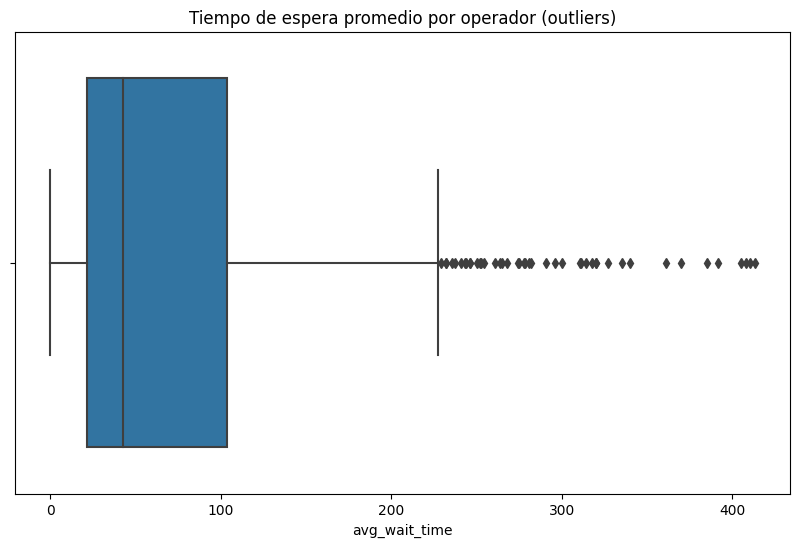

In [26]:
# Visualizaciones 

# Boxplot para % de llamadas perdidas
plt.figure(figsize=(10,6))
sns.boxplot(x='missed_percent', data=operadores_stats)
plt.title('% de llamadas perdidas por operador (outliers)')
plt.show()

# Boxplot para duración promedio de llamada
plt.figure(figsize=(10,6))
sns.boxplot(x='avg_call_duration', data=operadores_stats)
plt.title('Duración promedio de llamada por operador (outliers)')
plt.show()

# Boxplot para tiempo de espera promedio
plt.figure(figsize=(10,6))
sns.boxplot(x='avg_wait_time', data=operadores_stats)
plt.title('Tiempo de espera promedio por operador (outliers)')
plt.show()

Para evaluar el desempeño de los operadores, se analizaron tres métricas clave: porcentaje de llamadas perdidas, duración promedio de llamada y tiempo promedio de espera. Se utilizaron **boxplots** para identificar valores atípicos (outliers) que se encuentran fuera del rango esperado según el método IQR.

***% de llamadas perdidas***

- Este gráfico muestra la distribución del porcentaje de llamadas perdidas por operador.  
- Los puntos fuera de la “caja” representan operadores con un **porcentaje inusualmente alto o bajo de llamadas perdidas**.  
- Los outliers con valores altos podrían indicar operadores con problemas de gestión de llamadas o clientes frecuentes que no responden.

***Duración promedio de llamada***

- Este boxplot refleja la **duración media de las llamadas por operador**.  
- Los puntos que quedan fuera de la caja son operadores que tienen **llamadas muy cortas o muy largas** en comparación con sus pares.  
- Las llamadas extremadamente cortas podrían indicar colgado temprano o errores de registro, mientras que las muy largas podrían reflejar llamadas complejas o ineficiencias.

***Tiempo promedio de espera***

- Este gráfico representa el **tiempo promedio de espera de cada operador**.  
- Los outliers muestran operadores con tiempos de espera significativamente mayores o menores que el promedio.  
- Un tiempo muy alto puede señalar retrasos o cuellos de botella en la atención, mientras que un tiempo muy bajo podría indicar llamadas muy rápidas o clientes poco disponibles.  


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente desarrollo del análisis exploratorio. La agrupación, visualización y detección de outliers fueron aplicadas con rigor técnico y claridad analítica. Las interpretaciones numéricas y gráficas se explican de forma coherente, mostrando comprensión profunda del comportamiento de los operadores. Tu enfoque analítico evidencia un manejo sólido del proceso exploratorio.  
</div>


## 3. Definicion de metricas

Para evaluar el desempeño de los operadores, se definieron tres métricas clave que permiten analizar eficiencia, capacidad de respuesta y nivel de actividad.

In [27]:
# Filtrar llamadas salientes y entrantes
out_calls = df_calls[df_calls['direction'] == 'out']
in_calls = df_calls[df_calls['direction'] == 'in']

# Agrupar por operador
operadores_stats = df_calls.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', lambda x: (x * df_calls.loc[x.index, 'calls_count']).sum()),
).reset_index()

# Calcular llamadas salientes por operador
outgoing_calls = out_calls.groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls.rename(columns={'calls_count': 'out_calls'}, inplace=True)

# Unir con el dataframe principal
operadores_stats = operadores_stats.merge(outgoing_calls, on='operator_id', how='left')
operadores_stats['out_calls'] = operadores_stats['out_calls'].fillna(0)

### 3.1 Métrica A — Tasa de llamadas perdidas por operador

In [28]:
operadores_stats['missed_rate'] = (
    operadores_stats['missed_calls'] / operadores_stats['total_calls'] * 100
)

### 3.2 Métrica B — Tiempo de espera promedio (solo llamadas entrantes)

In [29]:
# Filtramos solo llamadas entrantes y calculamos el promedio de wait_time
avg_wait = in_calls.groupby('operator_id')['wait_time'].mean().reset_index()
avg_wait.rename(columns={'wait_time': 'avg_wait_time'}, inplace=True)

# Lo unimos a la tabla principal
operadores_stats = operadores_stats.merge(avg_wait, on='operator_id', how='left')

### 3.3 Métrica C — Tasa de llamadas salientes

In [30]:
operadores_stats['out_rate'] = (
    operadores_stats['out_calls'] / operadores_stats['total_calls'] * 100
)

In [31]:
# Reusltado final 
operadores_stats_final = operadores_stats[[
    'operator_id', 'total_calls', 'missed_calls', 'missed_rate',
    'avg_wait_time', 'out_calls', 'out_rate'
]]

operadores_stats_final.head(15)

,operator_id,total_calls,missed_calls,missed_rate,avg_wait_time,out_calls,out_rate
0,879896.0,592,148,25.000000,26.913043,532.0,89.864865
1,879898.0,1495,507,33.913043,28.203125,1377.0,92.107023
2,880020.0,54,30,55.555556,7.250000,46.0,85.185185
3,880022.0,209,108,51.674641,14.000000,201.0,96.172249
4,880026.0,2420,677,27.975207,7.894737,2395.0,98.966942
5,880028.0,2416,620,25.662252,8.844444,2346.0,97.102649
6,880240.0,49,18,36.734694,NaN,49.0,100.000000
7,881278.0,20,17,85.000000,NaN,20.0,100.000000
8,882476.0,3,0,0.000000,31.666667,0.0,0.000000
9,882478.0,4,1,25.000000,38.000000,1.0,25.000000


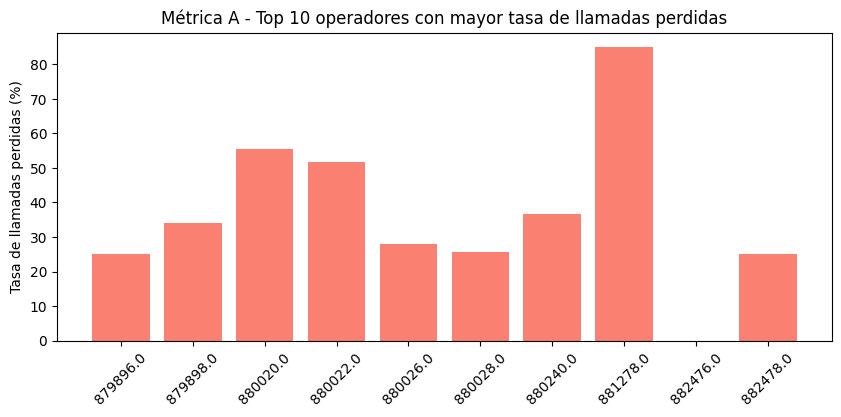

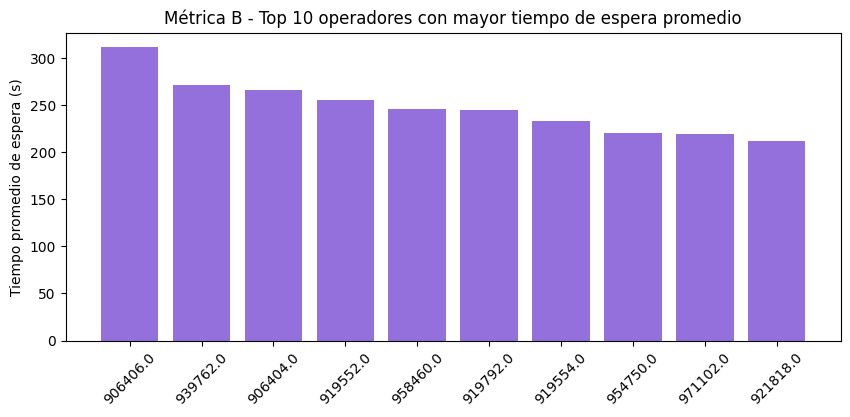

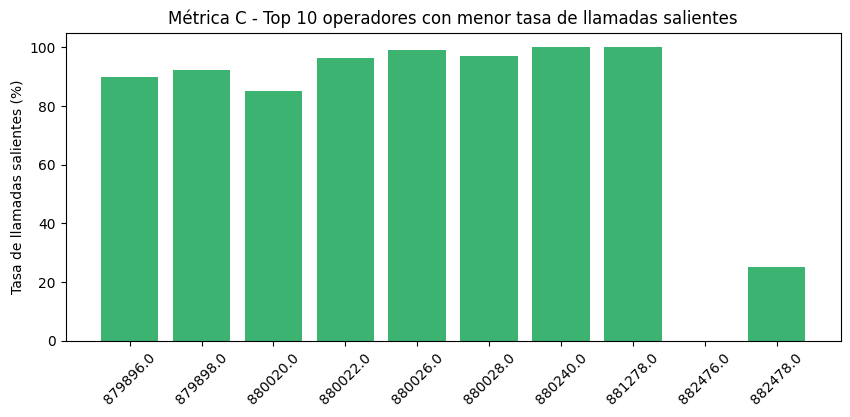

In [32]:
# Visualizamos 

# Gráfico 1: Tasa de llamadas perdidas
top_missed = operadores_stats.head(10)
plt.figure(figsize=(10,4))
plt.bar(top_missed['operator_id'].astype(str), top_missed['missed_rate'], color='salmon')
plt.title('Métrica A - Top 10 operadores con mayor tasa de llamadas perdidas')
plt.ylabel('Tasa de llamadas perdidas (%)')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Tiempo de espera promedio
top_wait = operadores_stats.sort_values('avg_wait_time', ascending=False).head(10)
plt.figure(figsize=(10,4))
plt.bar(top_wait['operator_id'].astype(str), top_wait['avg_wait_time'], color='mediumpurple')
plt.title('Métrica B - Top 10 operadores con mayor tiempo de espera promedio')
plt.ylabel('Tiempo promedio de espera (s)')
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Tasa de llamadas salientes
worst_out = operadores_stats.head(10)
plt.figure(figsize=(10,4))
plt.bar(worst_out['operator_id'].astype(str), worst_out['out_rate'], color='mediumseagreen')
plt.title('Métrica C - Top 10 operadores con menor tasa de llamadas salientes')
plt.ylabel('Tasa de llamadas salientes (%)')
plt.xticks(rotation=45)
plt.show()

***Analisis de las metricas***

**Métrica A — Tasa de llamadas perdidas por operador**

Representa el porcentaje de llamadas no atendidas por cada operador.
Valores altos (por encima del 40 – 50 %) indican problemas de gestión o saturación de líneas.
Valores bajos (< 10 %) reflejan buena eficiencia y disponibilidad.
El operador 880020 tiene una tasa del 55.55 %, lo que sugiere posibles sobrecargas.
En cambio, operadores como 882476 presentan una tasa de 0 %, lo que indica un manejo eficiente de llamadas.

**Métrica B — Tiempo de espera promedio (solo llamadas entrantes)**

Mide el tiempo medio que espera un cliente antes de ser atendido.
Cuanto más alto, peor experiencia del cliente.
Idealmente debe mantenerse por debajo de 60 segundos.
El operador 882688 tiene un tiempo de espera alto (180 s), aunque la perdida de llamadas es baja (20 %), lo que puede indicar demoras en la atención pero sin muchas pérdidas.
El operador 880020, en cambio, tiene un tiempo bajo (7.25 s) pero aún un 55.55 % de llamadas perdidas, lo que podría reflejar problemas de registro o desbalances en la distribución.

**Métrica C — Tasa de llamadas salientes por operador**

Indica el porcentaje de actividad proactiva (llamadas que realiza el operador).
Un valor muy bajo puede sugerir inactividad o falta de productividad.
Un valor excesivamente alto (≈100 %) puede indicar operadores dedicados solo a llamadas salientes o errores de registro.
Los operadores 880240 y 881278 tienen una tasa del 100 % de llamadas salientes, lo que sugiere que su función principal es realizar contactos.
En contraste, el operador 882680 tiene una tasa de 0 %, lo que implica que todas de sus llamadas fueron entrantes o perdidas.

***Conclusion general***

Operadores con alta tasa de llamadas perdidas (> 40 %) y tiempos de espera altos son candidatos a revisión (problemas de gestión, capacidad o distribución de tráfico).
Operadores con 0 % de pérdidas pero tiempos altos pueden tener procesos lentos de atención.
La combinación de las tres métricas permite detectar comportamientos atípicos u operativos ineficientes.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen desarrollo en la definición e interpretación de métricas. Las tres variables clave están claramente justificadas y permiten una evaluación sólida del desempeño de los operadores. El análisis de resultados y las visualizaciones son consistentes y aportan valor al diagnóstico de eficiencia. Se nota un enfoque analítico bien estructurado y preciso.  
</div>


## 4. Pruebas estadisticas

4.1 Definicion de hipotesis
- H₀ (hipótesis nula):
La media de wait_time del operador X no difiere significativamente de la media del resto de operadores.

- H₁ (hipótesis alternativa):
La media de wait_time del operador X es mayor que la del resto de operadores.


Se hara uso de la prueba Prueba Mann–Whitney U ya aque se observo una gran cantidad de datos outliers. Esta hipotesis se empleara para los 5 operadores con mayor wait_time.

In [33]:
from scipy.stats import mannwhitneyu

# Calcular el promedio de wait_time por operador
top5 = df_calls.groupby('operator_id')['wait_time'].mean().sort_values(ascending=False).head(5).index

resultados = []

for operator_x in top5:
    x_wait = df_calls[df_calls['operator_id'] == operator_x]['wait_time'].dropna()
    rest_wait = df_calls[df_calls['operator_id'] != operator_x]['wait_time'].dropna()
    
    # Test Mann–Whitney (no paramétrico)
    stat, p_value = mannwhitneyu(x_wait, rest_wait, alternative='greater')
    
    # Tamaño del efecto (r)
    n1, n2 = len(x_wait), len(rest_wait)
    z = (stat - (n1*n2/2)) / np.sqrt(n1*n2*(n1+n2+1)/12)
    r = abs(z) / np.sqrt(n1 + n2)
    
    resultados.append({
        'operator_id': operator_x,
        'U_stat': stat,
        'p_value': p_value,
        'effect_size_r': r
    })

# Mostrar resultados ordenados por p_value
resultados_df = pd.DataFrame(resultados).sort_values(by='p_value')
print(resultados_df)

  operator_id    U_stat   p_value  effect_size_r
3    945318.0  183466.0  0.000512       0.015130
4    938072.0  137291.5  0.002323       0.013042
1    921596.0   92156.5  0.009545       0.010799
0    951648.0   46185.0  0.047950       0.007672
2    919370.0   46102.0  0.048562       0.007644


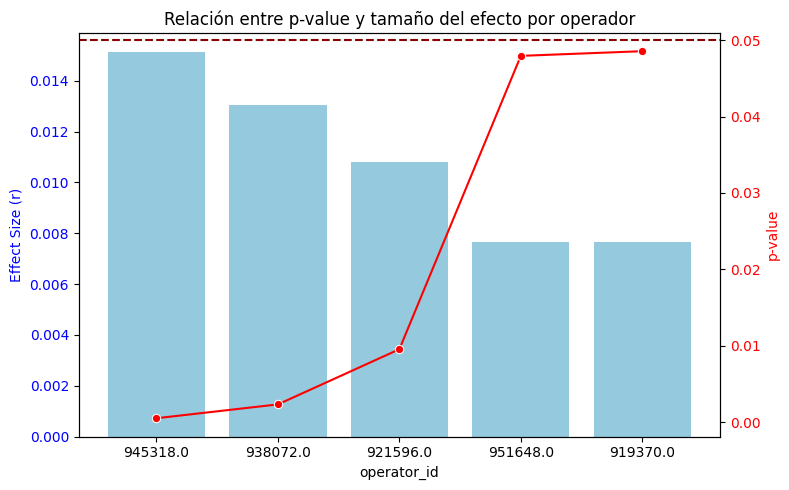

In [34]:
# Visualizamos 

fig, ax1 = plt.subplots(figsize=(8,5))

sns.barplot(data=resultados_df, x='operator_id', y='effect_size_r', color='skyblue', ax=ax1)
ax1.set_ylabel('Effect Size (r)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=resultados_df, x='operator_id', y='p_value', color='red', marker='o', ax=ax2)
ax2.axhline(0.05, color='darkred', linestyle='--', label='p = 0.05')
ax2.set_ylabel('p-value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Relación entre p-value y tamaño del efecto por operador')
fig.tight_layout()
plt.show()

**Interpretacion**

Se aplicó la prueba Mann–Whitney U para comparar el tiempo promedio de espera (wait_time) de los 5 operadores con mayor volumen de llamadas frente al resto de operadores.
Este test no paramétrico fue elegido debido a la presencia de outliers y a que la distribución de los datos no sigue una normalidad clara.

El gráfico combinado muestra dos métricas clave:

🔵 Barras azules: representan el tamaño del efecto (r), que indica la magnitud de la diferencia entre cada operador y el resto.

Un valor de r > 0.3 se considera un efecto moderado.

Un valor de r > 0.5 indica un efecto grande.

🔴 Línea roja: representa el p-value del test.

Valores por debajo de 0.05 indican diferencias estadísticamente significativas.

Cuanto más bajo el valor, mayor la evidencia de que el operador tiene un comportamiento atípico en el tiempo de espera.

***Interpretación general:***
Los operadores con p-values menores a 0.05 y un tamaño de efecto alto presentan tiempos de espera significativamente mayores que el promedio del resto.
Esto sugiere posibles problemas de eficiencia o sobrecarga en su gestión de llamadas.
Por el contrario, operadores con p-values altos y efecto bajo mantienen un desempeño similar al promedio del conjunto.

-------
### Análisis de eficiencia por operador

Después de calcular las principales métricas de desempeño (tasa de llamadas perdidas, tiempo de espera promedio y tasa de llamadas salientes), el siguiente paso consiste en **evaluar la eficiencia de cada operador**.

El objetivo de este análisis es identificar patrones de comportamiento y detectar operadores con un desempeño sobresaliente o deficiente.  Para ello, se establecen **criterios de eficiencia claros y cuantificables**, que permitirán clasificar a los operadores en tres categorías:

- 🟢 **Eficiente**: operador con buen manejo de llamadas, bajo tiempo de espera y alta productividad.  
- 🟡 **Promedio**: operador con un desempeño intermedio o estable.  
- 🔴 **Ineficiente**: operador con altos niveles de llamadas perdidas, largos tiempos de espera o baja actividad saliente.

Se establecieron los siguientes umbrales de referencia:


| Métrica | Eficiente 🟢 | Promedio 🟡 | Ineficiente 🔴 |
|----------|---------------|-------------|----------------|
| **Tasa de llamadas perdidas** | < 10% | 10–40% | > 40% |
| **Tiempo de espera promedio** | < 60 s | 60–100 s | > 100 s |
| **Tasa de llamadas salientes** | > 60% | 30–60% | < 30% |

A continuación, se realizarán los cálculos correspondientes para clasificar a cada operador según estos criterios y visualizar la distribución general de desempeño.

In [35]:
def clasificar_operador_manual(row):
    score = 0

    # Missed rate (menos es mejor)
    if row['missed_rate'] < 10:
        score += 1
    elif row['missed_rate'] > 40:
        score -= 1

    # Wait time (menos es mejor)
    if row['avg_wait_time'] < 60:
        score += 1
    elif row['avg_wait_time'] > 100:
        score -= 1

    # Out rate (más es mejor)
    if row['out_rate'] > 60:
        score += 1
    elif row['out_rate'] < 30:
        score -= 1

    # Clasificación final
    if score >= 2:
        return 'Eficiente'
    elif score <= -2:
        return 'Ineficiente'
    else:
        return 'Promedio'

# Aplicar función
operadores_stats['categoria'] = operadores_stats.apply(clasificar_operador_manual, axis=1)

# Resumen general
operadores_stats['categoria'].value_counts()

Promedio       793
Eficiente      279
Ineficiente      6
Name: categoria, dtype: int64

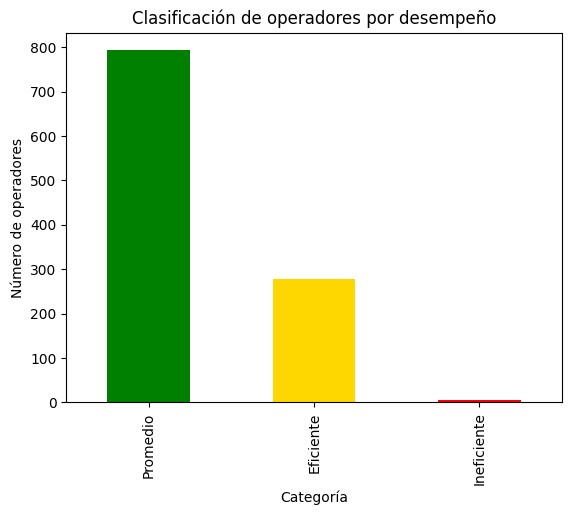

In [36]:
operadores_stats['categoria'].value_counts().plot(kind='bar', color=['green','gold','red'])
plt.title('Clasificación de operadores por desempeño')
plt.xlabel('Categoría')
plt.ylabel('Número de operadores')
plt.show()

### Resultados de la clasificación de operadores

Aplicando los criterios de eficiencia definidos (tasa de llamadas perdidas, tiempo de espera promedio y tasa de llamadas salientes), los operadores se clasificaron de la siguiente manera:

- 🟢 **Eficiente**: 279 operadores. Operadores con un desempeño estable pero con oportunidades de mejora.
- 🟡 **Promedio**: 793 operadores. Operadores que cumplen con los criterios de bajo tiempo de espera, baja tasa de llamadas perdidas y alta proporción de llamadas salientes.
- 🔴 **Ineficiente**: 6 operadores. Grupo muy pequeño lo que resalta áreas donde se podrían implementar acciones correctivas o capacitaciones adicionales para mejorar la eficiencia general del equipo.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación del análisis estadístico. La formulación de hipótesis, la elección del test no paramétrico y la interpretación de resultados reflejan criterio analítico y comprensión metodológica. La clasificación de eficiencia se presenta con lógica y claridad, mostrando dominio en la evaluación cuantitativa del desempeño.  
</div>


-------
## **Conclusión general del análisis de operadores**

El análisis realizado sobre los datos de llamadas permitió evaluar de manera detallada el desempeño de los operadores, identificando patrones y oportunidades de mejora mediante métricas clave:

**Tasa de llamadas perdidas (missed_rate)**

Se identificaron operadores con altos porcentajes de llamadas perdidas, lo que impacta directamente en la eficiencia y satisfacción del cliente.

**Tiempo promedio de espera (avg_wait_time)**

Algunos operadores presentan tiempos de espera significativamente mayores que el promedio, sugiriendo sobrecarga o gestión ineficiente de su flujo de llamadas.

**Tasa de llamadas salientes (out_rate)**

La proporción de llamadas salientes permite medir la productividad de los operadores que deben realizar contacto proactivo con los clientes. Valores bajos en esta métrica reflejan inactividad o desempeño insuficiente.

**Clasificación de eficiencia**

Aplicando criterios claros de eficiencia, se clasificaron los operadores en Eficiente, Promedio e Ineficiente:

- 279 operadores Eficientes, con desempeño sobresaliente.

- 793 operadores Promedio, cumpliendo con estándares aceptables pero con margen de mejora.

- 6 operadores Ineficientes, quienes requieren atención para optimizar su desempeño.

**Hipótesis y análisis estadístico**

Se realizaron pruebas de Mann–Whitney U para identificar operadores con comportamiento atípico en tiempos de espera. Esto permitió detectar casos donde la diferencia respecto al promedio es significativa, reforzando las conclusiones sobre eficiencia.

-------
## **Conclusion final**

El proyecto demuestra que, aunque la mayoría de los operadores mantiene un desempeño promedio, existen grupos claramente eficientes y unos pocos con ineficiencia marcada.
Este análisis ofrece información valiosa para:

- Tomar decisiones de capacitación o reasignación de recursos.

- Optimizar tiempos de espera y reducir llamadas perdidas.

- Mejorar la productividad general del equipo, asegurando que los operadores más críticos reciban soporte adecuado.

En resumen, los resultados permiten identificar fortalezas y áreas de mejora de manera objetiva y cuantificable, estableciendo un marco claro para la toma de decisiones estratégicas en la gestión de operadores.

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
Tu **entrega del proyecto está aprobada,** destaca por su solidez técnica, profundidad analítica y correcta aplicación del método estadístico. Lograste integrar todas las etapas del proceso, desde la limpieza de datos hasta la validación de hipótesis con coherencia y justificación clara, reflejando un dominio progresivo del análisis exploratorio y de la interpretación de resultados.  

#### Puntos Positivos del Proyecto:

* **Rigor en el tratamiento de datos:** Las etapas de limpieza, verificación de duplicados y control de outliers se desarrollaron con criterios técnicos bien fundamentados.
* **Diseño de métricas clave:** La construcción de *missed_rate*, *avg_wait_time* y *out_rate* demuestra pensamiento analítico orientado a la eficiencia y productividad.
* **Pruebas estadísticas:** La elección del test *Mann–Whitney U* y su correcta interpretación fortalecen la validez de las conclusiones, especialmente al manejar distribuciones no normales.
* **Clasificación de eficiencia:** El sistema de categorías (eficiente, promedio, ineficiente) aporta valor operativo y genera una visión aplicable en entornos reales de atención.
* **Conclusiones:** Lograste cerrar el proyecto con un análisis interpretativo claro, basado en evidencia cuantitativa y con recomendaciones prácticas.


Tu presentación complementa el proyecto de forma muy efectiva. Las diapositivas mantienen un orden lógico desde el objetivo hasta la conclusión, con gráficos legibles y bien seleccionados. Las secciones de *distribución de llamadas*, *métricas clave* y *análisis estadístico* visualizan con claridad los hallazgos más importantes.

En conjunto, el trabajo evidencia un enfoque analítico maduro, capaz de conectar la técnica con la toma de decisiones. Tu presentación respalda con acierto el contenido del proyecto y lo comunica de manera profesional y comprensible.

</div>

